# DANTE.py Figure Maker

En este documento se harán todas las gráficas para el TFG. Los datos númericos se han calculado previamente con DANTE.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.lines as mlines
import seaborn as sns
import pandas as pd

## Estrellas de Neutrones

### EoS

#### Régimen de alta densidad

(1e-07, 0.001)

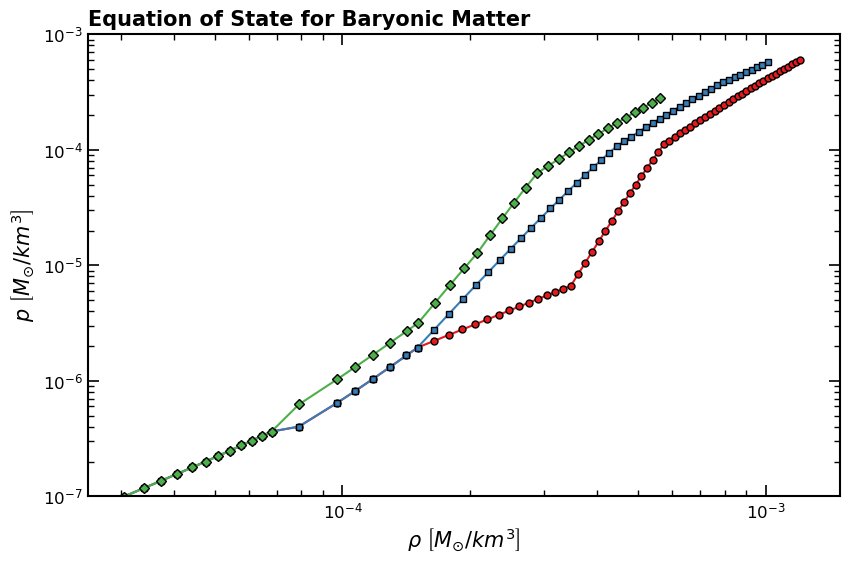

In [35]:
data = {}

eos_list = ['soft', 'middle', 'stiff']
for eos in eos_list:
    eos_data = pd.read_excel(f"data_eos\eos_{eos}.xlsx")
    data[f"{eos}"] = eos_data

fig, ax = plt.subplots(figsize=(9.71, 6))
colors = sns.color_palette("Set1", 10)
eos_colors = {"soft": 0, "middle": 1, "stiff": 2}
eos_markers = {"soft": "o", "middle": "s", "stiff": "D"}

for eos in eos_list:
    ax.plot(data[f"{eos}"]["Density"], data[f"{eos}"]["Pressure"], 
            label=f"{eos}", color=colors[eos_colors[f"{eos}"]], linewidth=1.5, linestyle='-',
           marker = eos_markers[f'{eos}'],  mfc=colors[eos_colors[f"{eos}"]], mec = 'k', ms = 5)

plt.title(r'Equation of State for Baryonic Matter', fontsize=15, loc='left', fontweight='bold')
ax.set_xlabel(r'$\rho$ $\left[ M_{\odot} / km^3 \right]$', fontsize=15, loc='center')
ax.set_ylabel(r'$p$ $\left[ M_{\odot} / km^3 \right]$', fontsize=15, loc='center')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(-3, 3))
ax.set_xscale('log')
ax.set_yscale('log')

ax.tick_params(axis='both', which='major', direction='in', length=8, width=1.2, labelsize=12, top=True, right=True)
ax.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=12, top=True, right = True)
ax.minorticks_on()

ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')

ax.set_xlim(2.5e-5, 1.5e-3)
ax.set_ylim(1e-7, 1e-3)



#### Régimen de baja densidad

### Estudio de la rigidez

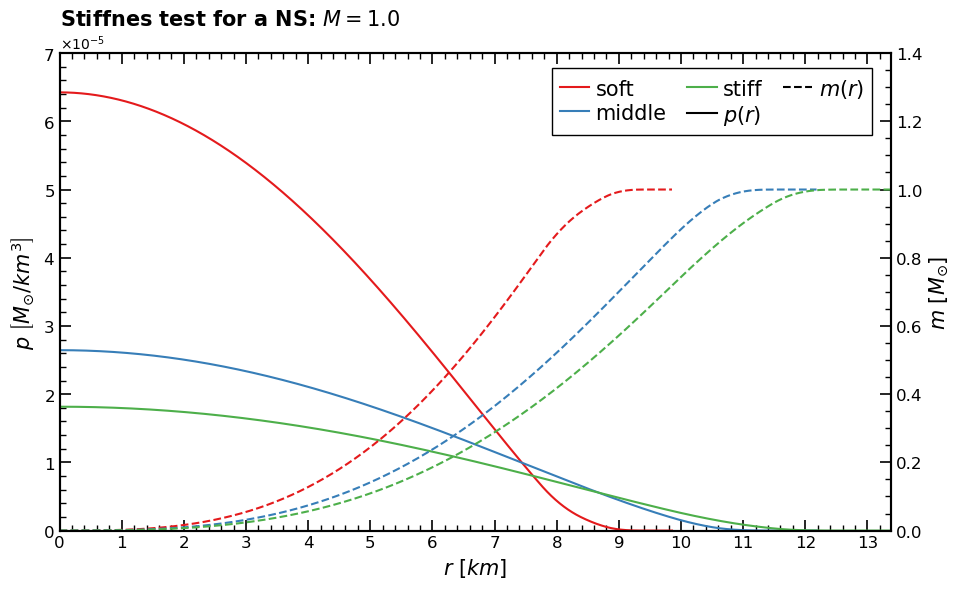

In [12]:
data = {}

s_type = 1
d_type = 0
EsOS = ['soft', 'middle', 'stiff']
p1_c = 'M'
p1_v = 1.0

for eos_c in EsOS:
    df = pd.read_csv(f"data\{s_type}_{d_type}_{eos_c}_{p1_c}_{p1_v}.csv")
    data[f'{eos_c}'] = df

# Configure the plot
fig, ax1 = plt.subplots(figsize=(9.71, 6))
colors = sns.color_palette("Set1", 10)
eos_colors = {"soft": 0, "middle": 1, "stiff": 2}

# Plot the pressure
for eos_c in EsOS:
    c = eos_colors[eos_c]
    ax1.plot(data[f'{eos_c}']['r'], data[f'{eos_c}']['p_A'], label=rf'$p_{{{eos_c}}}(r)$', color = colors[c], linewidth=1.5, linestyle='-')
ax1.set_xlabel(r'$r$ $\left[km\right]$', fontsize=15, loc='center')
ax1.set_ylabel(r'$p$ $\left[ M_{\odot} / km^3 \right]$', fontsize=15, loc='center', color='k')
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(-3, 3))

# Plot the mass
ax2 = ax1.twinx()
for eos_c in EsOS:
    c = eos_colors[eos_c]
    ax2.plot(data[f'{eos_c}']['r'], data[f'{eos_c}']['m'], label=rf'$m_{{{eos_c}}}(r)$', color = colors[c], linewidth=1.5, linestyle='--')
ax2.set_ylabel(r'$m$ $\left[ M_{\odot} \right]$', fontsize=15, loc='center', color='k')

# Set limits
if True == True:
    ax1.set_xlim(0, 13.38)
    ax1.set_ylim(0, 7e-5)
    ax2.set_ylim(0, 1.4)

# Configure ticks
ax1.tick_params(axis='both', which='major', direction='in', length=8, width=1.2, labelsize=12, top=True)
ax1.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=12, top=True)
ax1.minorticks_on()
ax2.tick_params(axis='both', which='major', direction='in', length=8, width=1.2, labelsize=12, top=True, right=True)
ax2.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=12, top=True, right=True)
ax2.minorticks_on()

# Configure ticks spacing
if True == True:
    ax1.set_xticks(np.arange(0, 13.38, 1))
    #ax1.set_xticks(np.arange(0, 9.6, 0.2), minor=True)
    ax1.set_yticks(np.arange(0, 7.1e-5, 1e-5))
    #ax1.set_yticks(np.arange(0, 1.31e-4, 0.025e-4), minor=True)
    ax2.set_yticks(np.arange(0, 1.41, 0.2))
    #ax2.set_yticks(np.arange(0, 1.01, 0.02), minor=True)

# Set thicker axes
for ax in [ax1, ax2]:
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_color('k')
    ax.spines['right'].set_color('k')
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    
# Add a legend
Handles_list = [mlines.Line2D([], [], color=colors[0], linestyle='-', label=r"soft"),
mlines.Line2D([], [], color=colors[1], linestyle='-', label=r"middle"),
mlines.Line2D([], [], color=colors[2], linestyle='-', label=r"stiff"),
mlines.Line2D([], [], color='k', linestyle='-', label=r"$p(r)$"),
mlines.Line2D([], [], color='k', linestyle='--', label=r"$m(r)$")]
ax1.legend(handles=Handles_list, loc = "upper right", bbox_to_anchor=(0.99, 0.99), fontsize=15, frameon=True, fancybox=False, ncol = 3, edgecolor="black", framealpha=1, labelspacing=0.2, handletextpad=0.3, handlelength=1.4, columnspacing=1)


# Save Fig as pdf
plt.title(rf'Stiffnes test for a NS: $M={p1_v}$', loc='left', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f"figures\stiffness_test_NS_{p1_c}_{p1_v}.pdf", format="pdf", bbox_inches="tight")

plt.show()

Este gráfico muestra cómo la rigidez de la Ecuación de Estado de una estrella afecta a su estructura. Como vemos, todas las estrellas tienen la misma cantidad de materia, pero sus radios son diferentes. Si la Ecuación de Estado es blanda, el radio es menor. Esto se debe a que una EoS blanda permite que la materia sea más compacta, lo que reduce el radio y aumenta la presión central. En cambio, una EoS rígida reparte la materia en un radio mayor y tiene una presión menor. 

Esto significa que la rigidez de una EoS nos indica la fuerza a la que puede comprimirse la materia. Cuanto más dura es una estrella, más difícil es compactarla.

### Curvas de Masa-Radio

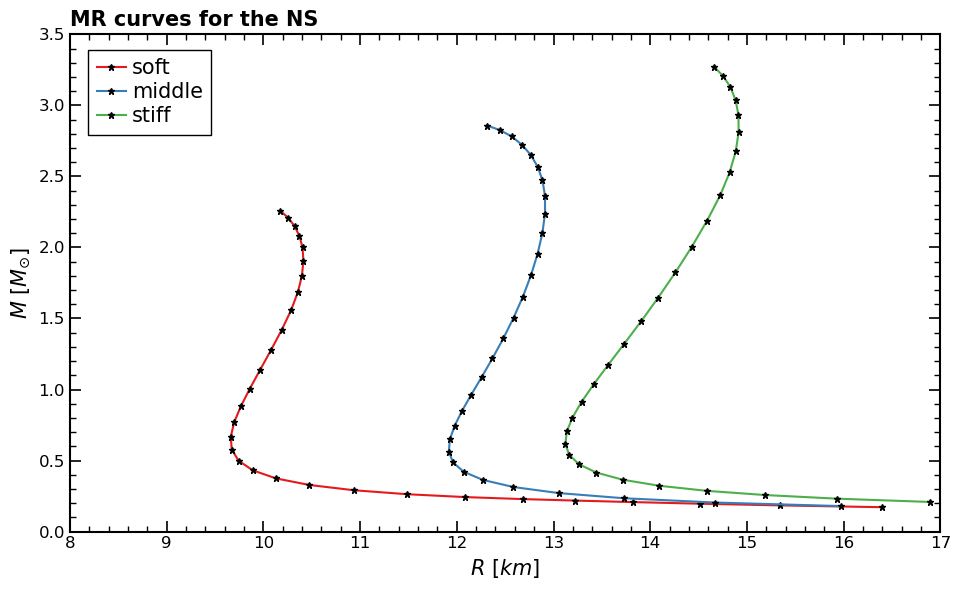

In [4]:
data = {}

s_type = 1
d_type = 1
EsOS = ['soft', 'middle', 'stiff']

for eos_c in EsOS:
    df = pd.read_csv(f"data\{s_type}_{d_type}_{eos_c}.csv")
    data[f"{eos_c}"] = df
    
# PLOT THE DATA
# Configure the plot
plt.figure(figsize=(9.71, 6))
colors = sns.color_palette("Set1", 10)
eos_colors = {"soft": 0, "middle": 1, "stiff": 2}

for eos_c in EsOS:
    c = eos_colors[eos_c]
    plt.plot(data[f"{eos_c}"]["R"], data[f"{eos_c}"]["M"], label = rf'{eos_c}', color = colors[c], linewidth = 1.5, linestyle = '-', marker = "*",  mfc='k', mec = 'k', ms = 5)

# Add labels and title
plt.title(r'MR curves for the NS', loc='left', fontsize=15, fontweight='bold')
plt.xlabel(r'$R$ $\left[km\right]$', fontsize=15, loc='center')
plt.ylabel(r'$M$ $\left[ M_{\odot} \right]$', fontsize=15, loc='center')

# Set limits
plt.xlim(8, 17)
plt.ylim(0, 3.5)

# Configure ticks for all four sides
plt.tick_params(axis='both', which='major', direction='in', length=8, width=1.2, labelsize=12, top=True, right=True)
plt.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=12, top=True, right=True)
plt.minorticks_on()

# Customize tick spacing 
plt.gca().set_xticks(np.arange(8, 17.1, 1))  # Major x ticks 
plt.gca().set_yticks(np.arange(0, 3.51, 0.5))  # Major y ticks 

# Set thicker axes
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)

# Add a legend
plt.legend(fontsize=15, loc = "upper left", bbox_to_anchor=(0.009, 0.99), frameon=True, fancybox=False, ncol = 1, edgecolor="black", framealpha=1, labelspacing=0.2, handletextpad=0.3, handlelength=1.4, columnspacing=1)

# Save plot as PDF
plt.tight_layout()
plt.savefig("figures\MR_curves_NS.pdf", format="pdf", bbox_inches="tight")

plt.show()

## Estrellas de Materia Oscura

### EoS

### Efectos Relativistas

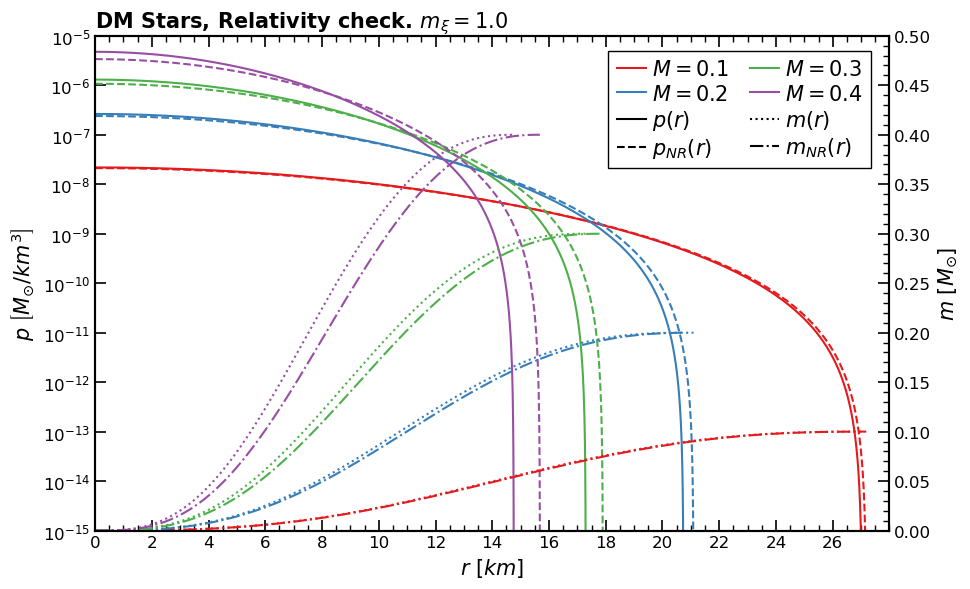

In [3]:
data = {}

s_type = 2
d_type = 0
eos_c = 'soft'
dm_m = 1.0
p1_c = 'M'
p1_v_list = [0.1, 0.2, 0.3, 0.4]

for p1_v in p1_v_list:
    df = pd.read_csv(f"data\{s_type}_{d_type}_{dm_m}_{p1_c}_{p1_v}.csv")
    df_NR = pd.read_csv(f"data\{s_type}_{d_type}_{dm_m}_{p1_c}_{p1_v}_NR.csv")
    data[f'{p1_v}'] = df
    data[f'{p1_v}_NR'] = df_NR

# Configure the plot
fig, ax1 = plt.subplots(figsize=(9.8, 6))
colors = sns.color_palette("Set1", 10)
c=0

# Set the axis.
ax1.set_xlabel(r'$r$ $\left[km\right]$', fontsize=15, loc='center')
ax1.set_ylabel(r'$p$ $\left[ M_{\odot} / km^3 \right]$', fontsize=15, loc='center', color='k')
ax1.tick_params(axis='y', colors='k')
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(-3, 3))
ax1.set_yscale('log')
ax2 = ax1.twinx()
ax2.set_ylabel(r'$m$ $\left[ M_{\odot} \right]$', fontsize=15, loc='center', color='k')
ax2.tick_params(axis='y', colors='k')

# The plot thickenss
for p1_v in p1_v_list:
    ax1.plot(data[f"{p1_v}"]['r'], data[f"{p1_v}"]['p_B'], color = colors[c], linewidth=1.5, linestyle='-')
    ax2.plot(data[f"{p1_v}"]['r'], data[f"{p1_v}"]['m'], color = colors[c], linewidth=1.5, linestyle=':')
    ax1.plot(data[f"{p1_v}_NR"]['r'], data[f"{p1_v}_NR"]['p_B'], color = colors[c], linewidth=1.5, linestyle='--')
    ax2.plot(data[f"{p1_v}_NR"]['r'], data[f"{p1_v}_NR"]['m'], color = colors[c], linewidth=1.5, linestyle='-.')
    c+=1

if True == True:
    ax1.set_xlim(0, 28)
    ax1.set_ylim(1e-15, 1e-5)
    ax2.set_ylim(0, 0.5)

ax1.tick_params(axis='both', which='major', direction='in', length=8, width=1.2, labelsize=12, top=True)
ax1.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=12, top=True)
ax1.minorticks_on()
ax2.tick_params(axis='both', which='major', direction='in', length=8, width=1.2, labelsize=12, top=True, right=True)
ax2.tick_params(axis='both', which='minor', direction='in', length=4, width=1, labelsize=12, top=True, right=True)
ax2.minorticks_on()

if True == True:
    ax1.set_xticks(np.arange(0, 28, 2))
    #ax1.set_xticks(np.arange(0, 9.6, 0.2), minor=True)
    ax1.set_yticks(np.geomspace(1e-15, 1e-5, 11))
    #ax1.set_yticks(np.arange(0, 8.1e-5, 0.2e-5), minor=True)
    ax2.set_yticks(np.arange(0, 0.51, 0.05))
    ax2.set_yticks(np.arange(0, 0.51, 0.01), minor=True)
    
for ax in [ax1, ax2]:
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_color('k')
    ax.spines['right'].set_color('k')
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')

    
handles_list = [
    mlines.Line2D([], [], color=colors[0], linestyle='-', label=r"$M=0.1$"),
    mlines.Line2D([], [], color=colors[1], linestyle='-', label=r"$M=0.2$"),
    mlines.Line2D([], [], color='k', linestyle='-', label=r"$p(r)$"),
    mlines.Line2D([], [], color='k', linestyle='--', label=r"$p_{{NR}}(r)$"),
    mlines.Line2D([], [], color=colors[2], linestyle='-', label=r"$M=0.3$"),
    mlines.Line2D([], [], color=colors[3], linestyle='-', label=r"$M=0.4$"),
    mlines.Line2D([], [], color='k', linestyle=':', label=r"$m(r)$"),
    mlines.Line2D([], [], color='k', linestyle='-.', label=r"$m_{{NR}}(r)$")]

plt.legend(handles=handles_list, loc = "upper right", bbox_to_anchor=(0.99, 0.99), fontsize=15, frameon=True, fancybox=False, ncol = 2, edgecolor="black", framealpha=1, labelspacing=0.2, handletextpad=0.3, handlelength=1.4, columnspacing=1)

# Save plot as PDF
plt.title(rf'DM Stars, Relativity check. $m_{{\xi}} = {dm_m}$', loc='left', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig(f"figures\{s_type}_relativity_check_{dm_m}.pdf", format="pdf", bbox_inches="tight")

plt.show()

En este gárfico podemos ver la diferencia que tiene considerar una EoS relativistas en la estructura de la estrella. Podemos ver que el caso no relativista (NR) en todos los casos es más rígido que el caso real. Esto se debe a que en el núcleo, donde las densidades y presiones tienen que ser relativistas, el caso NR nos dice que la presión es más fuerte de lo que es en realidad. Este aumento de presión en el caso NR hace que la materia sea más dificil de compactar haciendo que la EoS sea más rígida y el radio sea mayor.